In [ ]:
#Se conecta con google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
np.random.seed(0)
import random
random.seed(0)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
bnb=pd.read_csv('/content/drive/MyDrive/Machine Learning/BNB Historical Data (2).csv')
bnb_copy=bnb.copy()

In [ ]:
bnb.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/21/2023,211.1,214.3,215.1,209.21,540.64K,-1.50%
1,09/20/2023,214.3,217.2,217.8,213.50,380.15K,-1.33%
2,09/19/2023,217.2,216.0,219.6,215.50,355.33K,0.56%
3,09/18/2023,216.0,216.4,221.2,215.20,610.23K,-0.18%
4,09/17/2023,216.4,214.9,216.7,213.40,336.71K,0.70%


In [ ]:
bnb.shape

(1724, 7)

In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1724 non-null   object 
 1   Price     1724 non-null   float64
 2   Open      1724 non-null   float64
 3   High      1724 non-null   float64
 4   Low       1724 non-null   float64
 5   Vol.      1724 non-null   object 
 6   Change %  1724 non-null   object 
dtypes: float64(4), object(3)
memory usage: 94.4+ KB


In [ ]:
print(bnb['Date'])

0       09/21/2023
1       09/20/2023
2       09/19/2023
3       09/18/2023
4       09/17/2023
           ...    
1719    01/06/2019
1720    01/05/2019
1721    01/04/2019
1722    01/03/2019
1723    01/02/2019
Name: Date, Length: 1724, dtype: object


In [ ]:
bnb.index=pd.to_datetime(bnb['Date'])
print(bnb.index)

DatetimeIndex(['2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18',
               '2023-09-17', '2023-09-16', '2023-09-15', '2023-09-14',
               '2023-09-13', '2023-09-12',
               ...
               '2019-01-11', '2019-01-10', '2019-01-09', '2019-01-08',
               '2019-01-07', '2019-01-06', '2019-01-05', '2019-01-04',
               '2019-01-03', '2019-01-02'],
              dtype='datetime64[ns]', name='Date', length=1724, freq=None)


In [ ]:
bnb.index=bnb.index.tz_localize('UTC').tz_convert('US/Pacific')
print(bnb.index)

DatetimeIndex(['2023-09-20 17:00:00-07:00', '2023-09-19 17:00:00-07:00',
               '2023-09-18 17:00:00-07:00', '2023-09-17 17:00:00-07:00',
               '2023-09-16 17:00:00-07:00', '2023-09-15 17:00:00-07:00',
               '2023-09-14 17:00:00-07:00', '2023-09-13 17:00:00-07:00',
               '2023-09-12 17:00:00-07:00', '2023-09-11 17:00:00-07:00',
               ...
               '2019-01-10 16:00:00-08:00', '2019-01-09 16:00:00-08:00',
               '2019-01-08 16:00:00-08:00', '2019-01-07 16:00:00-08:00',
               '2019-01-06 16:00:00-08:00', '2019-01-05 16:00:00-08:00',
               '2019-01-04 16:00:00-08:00', '2019-01-03 16:00:00-08:00',
               '2019-01-02 16:00:00-08:00', '2019-01-01 16:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', name='Date', length=1724, freq=None)


In [ ]:
bnb.sort_index(inplace=True)
del bnb['Date']

In [ ]:
bnb.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%


In [ ]:
bnb.shape

(1724, 6)

Text(0.5, 1.0, 'Low')

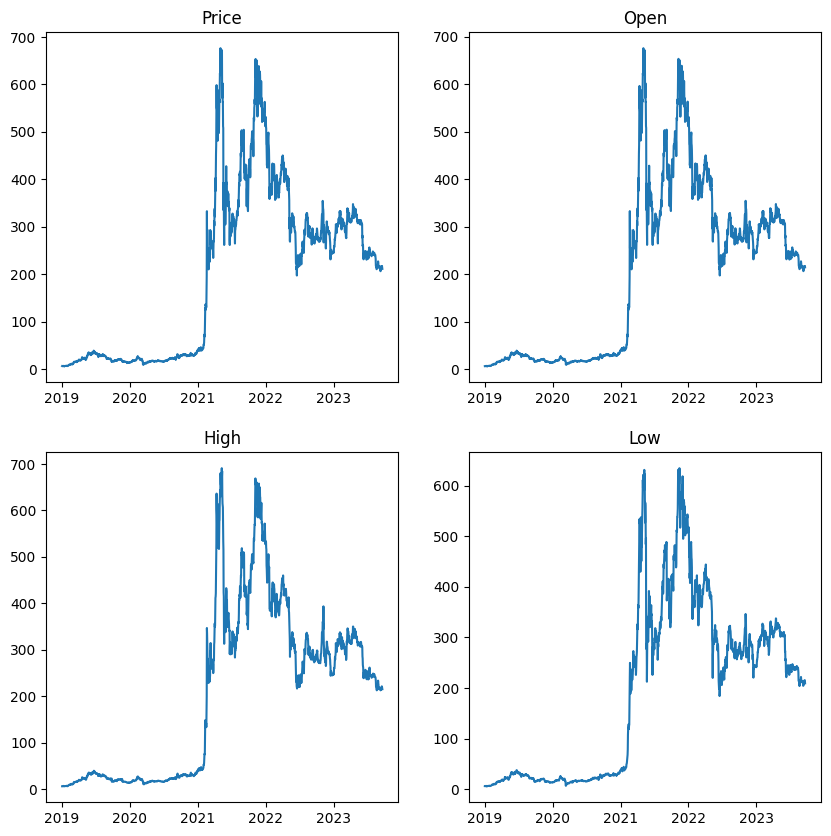

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(2,2,1)
plt.plot(bnb['Price'])
plt.title('Price')
plt.subplot(2,2,2)
plt.plot(bnb['Open'])
plt.title('Open')
plt.subplot(2,2,3)
plt.plot(bnb['High'])
plt.title('High')
plt.subplot(2,2,4)
plt.plot(bnb['Low'])
plt.title('Low')

In [ ]:
print(bnb.index.date)

[datetime.date(2019, 1, 1) datetime.date(2019, 1, 2)
 datetime.date(2019, 1, 3) ... datetime.date(2023, 9, 18)
 datetime.date(2023, 9, 19) datetime.date(2023, 9, 20)]


In [ ]:
bnb['Year']=bnb.index.year
bnb['Month']=bnb.index.month
bnb.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month
Date,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1


In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1724 entries, 2019-01-01 16:00:00-08:00 to 2023-09-20 17:00:00-07:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1724 non-null   float64
 1   Open      1724 non-null   float64
 2   High      1724 non-null   float64
 3   Low       1724 non-null   float64
 4   Vol.      1724 non-null   object 
 5   Change %  1724 non-null   object 
 6   Year      1724 non-null   int64  
 7   Month     1724 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 121.2+ KB


In [ ]:
bnb['Last_Day']=bnb.index.is_month_end
bnb.head(60)

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day
Date,,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1,False
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1,False
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1,False
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1,False
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1,False
2019-01-06 16:00:00-08:00,6.20,6.26,6.31,6.10,1.68M,-0.98%,2019,1,False
2019-01-07 16:00:00-08:00,6.52,6.20,6.80,6.14,3.95M,5.08%,2019,1,False
2019-01-08 16:00:00-08:00,6.56,6.52,6.85,6.35,4.17M,0.61%,2019,1,False
2019-01-09 16:00:00-08:00,5.80,6.56,6.57,5.66,3.35M,-11.47%,2019,1,False


In [ ]:
bnb.shape

(1724, 9)

In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1724 entries, 2019-01-01 16:00:00-08:00 to 2023-09-20 17:00:00-07:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1724 non-null   float64
 1   Open      1724 non-null   float64
 2   High      1724 non-null   float64
 3   Low       1724 non-null   float64
 4   Vol.      1724 non-null   object 
 5   Change %  1724 non-null   object 
 6   Year      1724 non-null   int64  
 7   Month     1724 non-null   int64  
 8   Last_Day  1724 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 122.9+ KB


In [ ]:
bnb['Change']=(bnb['Open']-bnb['Price'])/bnb['Open']
bnb['Trend'] = bnb['Change'] > 0
bnb.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend
Date,,,,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1,False,-0.010017,False
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1,False,0.042975,True
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1,False,-0.029361,False
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1,False,0.000000,False
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1,False,-0.048576,False


In [ ]:
bnb['dayofweek'] = bnb.index.dayofweek
bnb.head(10)

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend,dayofweek
Date,,,,,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1,False,-0.010017,False,1
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1,False,0.042975,True,2
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1,False,-0.029361,False,3
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1,False,0.000000,False,4
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1,False,-0.048576,False,5
2019-01-06 16:00:00-08:00,6.20,6.26,6.31,6.10,1.68M,-0.98%,2019,1,False,0.009585,True,6
2019-01-07 16:00:00-08:00,6.52,6.20,6.80,6.14,3.95M,5.08%,2019,1,False,-0.051613,False,0
2019-01-08 16:00:00-08:00,6.56,6.52,6.85,6.35,4.17M,0.61%,2019,1,False,-0.006135,False,1
2019-01-09 16:00:00-08:00,5.80,6.56,6.57,5.66,3.35M,-11.47%,2019,1,False,0.115854,True,2


In [ ]:
#Lag Features
bnb['Feature_lag_1_day'] = bnb['Open'].shift(1, freq='D')
bnb['Feature_lag_2_day'] = bnb['Open'].shift(2, freq='D')
bnb.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend,dayofweek,Feature_lag_1_day,Feature_lag_2_day
Date,,,,,,,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1,False,-0.010017,False,1,NaN,NaN
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1,False,0.042975,True,2,5.99,NaN
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1,False,-0.029361,False,3,6.05,5.99
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1,False,0.000000,False,4,5.79,6.05
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1,False,-0.048576,False,5,5.97,5.79


Text(0.5, 1.0, 'Lag 2 day')

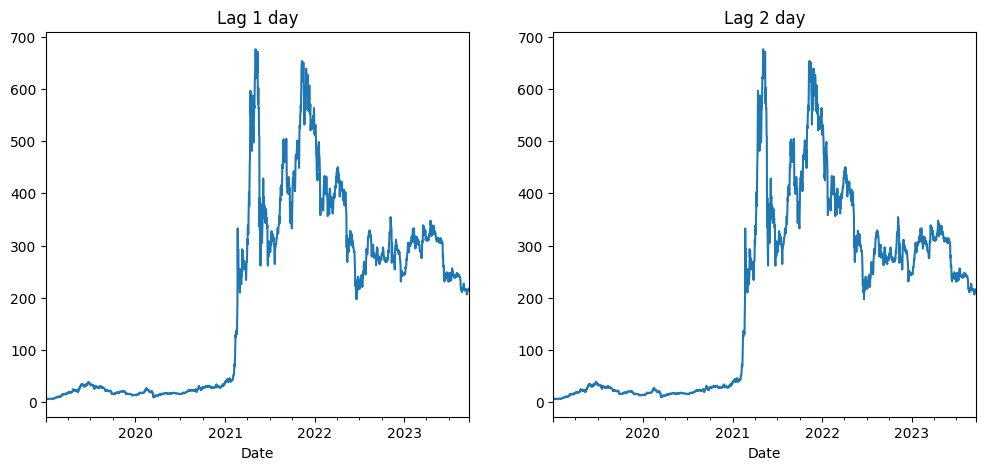

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
bnb['Feature_lag_1_day'].plot()
plt.title('Lag 1 day')
plt.subplot(1,2,2)
bnb['Feature_lag_2_day'].plot()
plt.title('Lag 2 day')

In [ ]:
bnb['Feature_rolling_2_day'] = bnb['Price'].rolling(window=2).mean()
bnb['Feature_rolling_7_day'] = bnb['Price'].rolling(window=7).mean()
bnb.head(23)

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend,dayofweek,Feature_lag_1_day,Feature_lag_2_day,Feature_rolling_2_day,Feature_rolling_7_day
Date,,,,,,,,,,,,,,,,
2019-01-01 16:00:00-08:00,6.05,5.99,6.09,5.85,2.13M,0.89%,2019,1,False,-0.010017,False,1,NaN,NaN,NaN,NaN
2019-01-02 16:00:00-08:00,5.79,6.05,6.06,5.78,1.53M,-4.19%,2019,1,False,0.042975,True,2,5.99,NaN,5.920,NaN
2019-01-03 16:00:00-08:00,5.96,5.79,5.99,5.75,1.66M,2.86%,2019,1,False,-0.029361,False,3,6.05,5.99,5.875,NaN
2019-01-04 16:00:00-08:00,5.97,5.97,6.10,5.93,1.63M,0.11%,2019,1,False,0.000000,False,4,5.79,6.05,5.965,NaN
2019-01-05 16:00:00-08:00,6.26,5.97,6.37,5.93,2.51M,4.95%,2019,1,False,-0.048576,False,5,5.97,5.79,6.115,NaN
2019-01-06 16:00:00-08:00,6.20,6.26,6.31,6.10,1.68M,-0.98%,2019,1,False,0.009585,True,6,5.97,5.97,6.230,NaN
2019-01-07 16:00:00-08:00,6.52,6.20,6.80,6.14,3.95M,5.08%,2019,1,False,-0.051613,False,0,6.26,5.97,6.360,6.107143
2019-01-08 16:00:00-08:00,6.56,6.52,6.85,6.35,4.17M,0.61%,2019,1,False,-0.006135,False,1,6.20,6.26,6.540,6.180000
2019-01-09 16:00:00-08:00,5.80,6.56,6.57,5.66,3.35M,-11.47%,2019,1,False,0.115854,True,2,6.52,6.20,6.180,6.181429


Text(0, 0.5, 'Price')

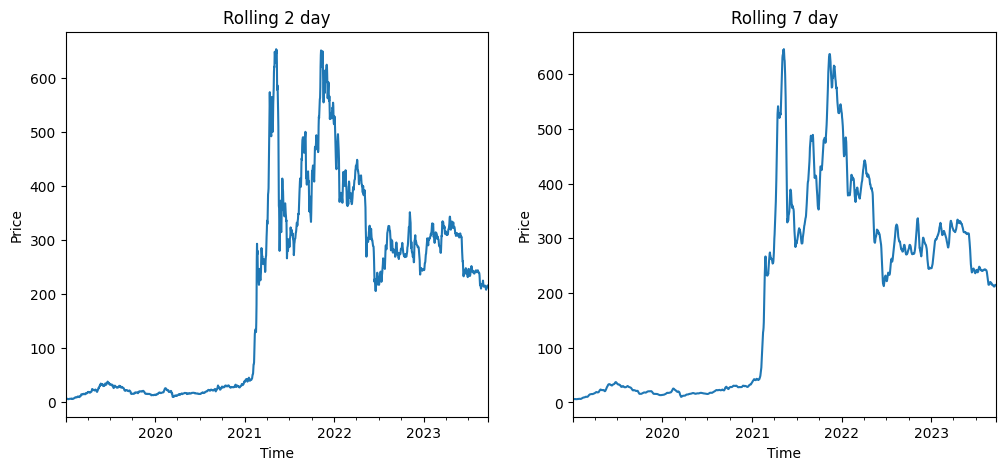

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
bnb['Feature_rolling_2_day'].plot()
plt.title('Rolling 2 day')
plt.xlabel('Time')
plt.ylabel('Price')
plt.subplot(1,2,2)
bnb['Feature_rolling_7_day'].plot()
plt.title('Rolling 7 day')
plt.xlabel('Time')
plt.ylabel('Price')

In [ ]:
bnb.dropna(inplace=True)
bnb.head(15)

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend,dayofweek,Feature_lag_1_day,Feature_lag_2_day,Feature_rolling_2_day,Feature_rolling_7_day
Date,,,,,,,,,,,,,,,,
2019-01-07 16:00:00-08:00,6.52,6.20,6.80,6.14,3.95M,5.08%,2019,1,False,-0.051613,False,0,6.26,5.97,6.360,6.107143
2019-01-08 16:00:00-08:00,6.56,6.52,6.85,6.35,4.17M,0.61%,2019,1,False,-0.006135,False,1,6.20,6.26,6.540,6.180000
2019-01-09 16:00:00-08:00,5.80,6.56,6.57,5.66,3.35M,-11.47%,2019,1,False,0.115854,True,2,6.52,6.20,6.180,6.181429
2019-01-10 16:00:00-08:00,5.96,5.84,6.12,5.69,2.56M,2.68%,2019,1,False,-0.020548,False,3,6.56,6.52,5.880,6.181429
2019-01-11 16:00:00-08:00,5.86,5.96,5.96,5.80,1.75M,-1.63%,2019,1,False,0.016779,True,4,5.84,6.56,5.910,6.165714
2019-01-12 16:00:00-08:00,5.47,5.86,5.89,5.38,1.42M,-6.71%,2019,1,False,0.066553,True,5,5.96,5.84,5.665,6.052857
2019-01-13 16:00:00-08:00,6.06,5.47,6.06,5.46,2.33M,10.78%,2019,1,False,-0.107861,False,6,5.86,5.96,5.765,6.032857
2019-01-14 16:00:00-08:00,5.81,6.06,6.06,5.68,1.37M,-4.11%,2019,1,False,0.041254,True,0,5.47,5.86,5.935,5.931429
2019-01-15 16:00:00-08:00,6.09,5.81,6.18,5.78,2.16M,4.85%,2019,1,False,-0.048193,False,1,6.06,5.47,5.950,5.864286


In [ ]:
bnb['Feature_Price_Mean'] = bnb['Price'].expanding(200).mean()
bnb['Feature_Open_Mean'] = bnb['Open'].expanding(200).mean()
bnb['Feature_High_Mean'] = bnb['High'].expanding(200).mean()
bnb['Feature_Low_Mean'] = bnb['Low'].expanding(200).mean()
bnb.dropna(inplace=True)
bnb.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Last_Day,Change,Trend,dayofweek,Feature_lag_1_day,Feature_lag_2_day,Feature_rolling_2_day,Feature_rolling_7_day,Feature_Price_Mean,Feature_Open_Mean,Feature_High_Mean,Feature_Low_Mean
Date,,,,,,,,,,,,,,,,,,,,
2019-07-25 17:00:00-07:00,28.88,28.93,29.03,28.21,2.97M,-0.15%,2019,7,False,0.001728,True,3,28.87,29.46,28.900,29.781429,20.648850,20.533700,21.275500,19.773050
2019-07-26 17:00:00-07:00,27.70,28.88,29.42,27.27,2.41M,-4.09%,2019,7,False,0.040859,True,4,28.93,28.87,28.290,29.300000,20.683930,20.575224,21.316020,19.810348
2019-07-27 17:00:00-07:00,27.72,27.71,27.86,26.66,2.17M,0.08%,2019,7,False,-0.000361,False,5,28.88,28.93,27.710,28.914286,20.718762,20.610545,21.348416,19.844257
2019-07-28 17:00:00-07:00,27.03,27.73,27.99,26.86,1.80M,-2.49%,2019,7,False,0.025243,True,6,27.71,28.88,27.375,28.370000,20.749852,20.645616,21.381133,19.878818
2019-07-29 17:00:00-07:00,26.94,27.03,27.12,26.23,1.87M,-0.32%,2019,7,False,0.003330,True,0,27.73,27.71,26.985,28.010000,20.780196,20.676912,21.409265,19.909951


Text(0, 0.5, 'Price')

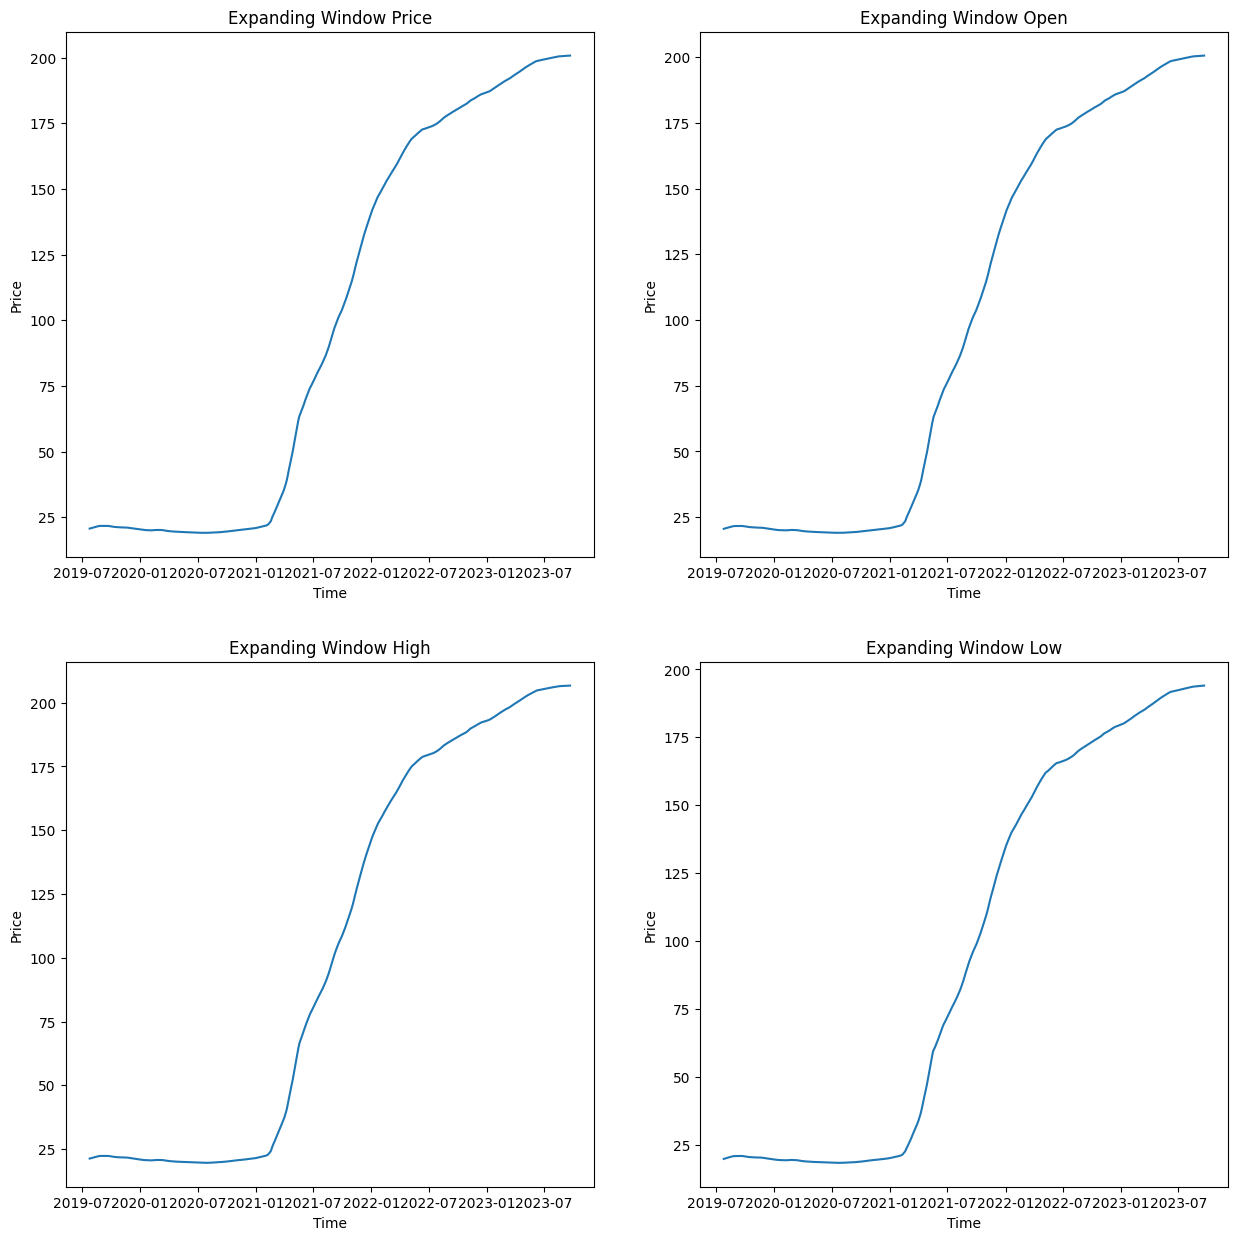

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(2,2,1)
plt.plot(bnb['Feature_Price_Mean'])
plt.title('Expanding Window Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.subplot(2,2,2)
plt.plot(bnb['Feature_Open_Mean'])
plt.title('Expanding Window Open')
plt.xlabel('Time')
plt.ylabel('Price')
plt.subplot(2,2,3)
plt.plot(bnb['Feature_High_Mean'])
plt.title('Expanding Window High')
plt.xlabel('Time')
plt.ylabel('Price')
plt.subplot(2,2,4)
plt.plot(bnb['Feature_Low_Mean'])
plt.title('Expanding Window Low')
plt.xlabel('Time')
plt.ylabel('Price')

In [ ]:
del bnb['Last_Day']
del bnb['Vol.']
del bnb['Change %']

In [ ]:
bnb.rename(columns={"dayofweek":"Feature_down"}, inplace=True)
bnb.head()

,Price,Open,High,Low,Year,Month,Change,Trend,Feature_down,Feature_lag_1_day,Feature_lag_2_day,Feature_rolling_2_day,Feature_rolling_7_day,Feature_Price_Mean,Feature_Open_Mean,Feature_High_Mean,Feature_Low_Mean
Date,,,,,,,,,,,,,,,,,
2019-07-25 17:00:00-07:00,28.88,28.93,29.03,28.21,2019,7,0.001728,True,3,28.87,29.46,28.900,29.781429,20.648850,20.533700,21.275500,19.773050
2019-07-26 17:00:00-07:00,27.70,28.88,29.42,27.27,2019,7,0.040859,True,4,28.93,28.87,28.290,29.300000,20.683930,20.575224,21.316020,19.810348
2019-07-27 17:00:00-07:00,27.72,27.71,27.86,26.66,2019,7,-0.000361,False,5,28.88,28.93,27.710,28.914286,20.718762,20.610545,21.348416,19.844257
2019-07-28 17:00:00-07:00,27.03,27.73,27.99,26.86,2019,7,0.025243,True,6,27.71,28.88,27.375,28.370000,20.749852,20.645616,21.381133,19.878818
2019-07-29 17:00:00-07:00,26.94,27.03,27.12,26.23,2019,7,0.003330,True,0,27.73,27.71,26.985,28.010000,20.780196,20.676912,21.409265,19.909951


**5° Parte**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
clf =RandomForestClassifier (random_state=0)
ml_pipeline=Pipeline([('scale',StandardScaler ()),('calssifier',clf)])
hyperparams={
    'calssifier_criterion': ['gini','entropy'],
    'calssifier_min_samples_split': [2,3,4,5],
    'calssifier_max_depth': [10,None],
    'calssifier_max_features': ['sqrt'],

}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf =RandomForestClassifier (random_state=0)

ml_pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('classifier', clf)
])


hyperparams = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__min_samples_split': [2,3,5],

    'classifier__max_depth':[10,None],
    'classifier__max_features':['sqrt']
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn. pipeline import Pipeline
import time

*Train model*

In [ ]:
def advanced_grid_search(x_train, y_train, x_test, y_test, ml_pipeline, hyperparams, cv=3,\
                         include_probas=False, is_regression=False):
  model_grid_search=GridSearchCV(ml_pipeline, param_grid=hyperparams, cv=cv, error_score=-1)
  start_time =time.time()

  model_grid_search.fit(x_train,y_train)

  best_model=model_grid_search.best_estimator_

  y_preds = best_model.predict(x_test)

  if  is_regression:
    rmse=np.sqrt(mean_squared_error(y_pred=y_preds, y_true=test_set['Trend']))
    print(f'RMSE:{rmse:.5f}')
  else:
    print(classification_report(y_true=y_test, y_pred=y_preds))
  print(f'Best params: {model_grid_search.best_params_}')
  end_time=time.time()
  print(f'Overvall took {(end_time - start_time):.2f} seconds')

  if include_probas:
    y_probas=best_model.predict_proba(x_test).max(axis=1)
    return best_model, y_preds, y_probas

  return best_model, y_preds

***Parte 5.1***

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(bnb)):
    train_times, test_times = bnb.iloc[train_index].index, bnb.iloc[test_index].index
    print(f'Iteration {i} \n -----------')
    print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
Testing between {test_times.min().date()} and {test_times.max().date()}\n''')

Iteration 0 
 -----------
Training between 2019-07-25 and 2020-04-03 .Testing between 2020-04-04 and 2020-12-12

Iteration 1 
 -----------
Training between 2019-07-25 and 2020-12-12 .Testing between 2020-12-13 and 2021-08-22

Iteration 2 
 -----------
Training between 2019-07-25 and 2021-08-22 .Testing between 2021-08-23 and 2022-05-02

Iteration 3 
 -----------
Training between 2019-07-25 and 2022-05-02 .Testing between 2022-05-03 and 2023-01-10

Iteration 4 
 -----------
Training between 2019-07-25 and 2023-01-10 .Testing between 2023-01-11 and 2023-09-20



In [ ]:
def split_data(bnb):
  train_bnb, test_bnb = bnb[:'2023-09-13'], bnb['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_bnb.filter(regex='Feature'), test_bnb.filter (regex='Feature') # split the features
  train_y, test_y = train_bnb['Trend'], test_bnb['Trend'] # split the output
  return train_bnb, test_bnb, train_x, train_y, test_x, test_y

In [ ]:
bnb.filter(regex='Feature_').corrwith(bnb['Trend']).sort_values()

Feature_down             0.011860
Feature_rolling_2_day    0.023613
Feature_rolling_7_day    0.034684
Feature_lag_1_day        0.038005
Feature_lag_2_day        0.038711
Feature_High_Mean        0.046084
Feature_Price_Mean       0.046096
Feature_Open_Mean        0.046147
Feature_Low_Mean         0.046152
dtype: float64

In [ ]:
train_bnb, test_bnb, train_x, train_y, test_x, test_y = split_data(bnb)

print("Date-time/Lag/Window/Rolling Features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling Features + Random Forest
              precision    recall  f1-score   support

       False       0.82      0.93      0.87       791
        True       0.91      0.77      0.83       728

    accuracy                           0.85      1519
   macro avg       0.86      0.85      0.85      1519
weighted avg       0.86      0.85      0.85      1519

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 3}
Overvall took 27.06 seconds


In [ ]:
bnb_copy=bnb.copy()
del bnb_copy['Feature_down']
del bnb_copy['Feature_rolling_2_day']
del bnb_copy['Feature_rolling_7_day']
del bnb_copy['Feature_lag_2_day']
del bnb_copy['Feature_lag_1_day']

In [ ]:
bnb_copy.filter(regex='Feature_').\
corrwith (bnb_copy['Trend']).sort_values ()

Feature_High_Mean     0.046084
Feature_Price_Mean    0.046096
Feature_Open_Mean     0.046147
Feature_Low_Mean      0.046152
dtype: float64

In [ ]:
def split_data_copy(price_df_copy) :
  train_bnb, test_bnb = bnb[:'2023-09-13'], bnb['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_bnb.filter(regex='Feature'), test_bnb.filter (regex='Feature') # split the features
  train_y, test_y = train_bnb['Trend'], test_bnb['Trend'] # split the output
  return train_bnb, test_bnb, train_x, train_y, test_x, test_y

In [ ]:
train_bnb, test_bnb, train_x, train_y, test_x, test_y = split_data_copy(bnb_copy)
print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
  train_x, train_y,
  test_x, test_y,
  ml_pipeline, hyperparams,
  cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.82      0.93      0.87       791
        True       0.91      0.77      0.83       728

    accuracy                           0.85      1519
   macro avg       0.86      0.85      0.85      1519
weighted avg       0.86      0.85      0.85      1519

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 3}
Overvall took 26.84 seconds


In [ ]:
price_2021 = bnb[(bnb["Year"]==2021)]
price_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 16:00:00-08:00 to 2021-12-31 16:00:00-08:00
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  365 non-null    float64
 1   Open                   365 non-null    float64
 2   High                   365 non-null    float64
 3   Low                    365 non-null    float64
 4   Year                   365 non-null    int64  
 5   Month                  365 non-null    int64  
 6   Change                 365 non-null    float64
 7   Trend                  365 non-null    bool   
 8   Feature_down           365 non-null    int64  
 9   Feature_lag_1_day      365 non-null    float64
 10  Feature_lag_2_day      365 non-null    float64
 11  Feature_rolling_2_day  365 non-null    float64
 12  Feature_rolling_7_day  365 non-null    float64
 13  Feature_Price_Mean     365 non-null    float64
 14  Feature_O

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(price_2021)):
  train_times, test_times = price_2021.iloc[train_index].index, price_2021.iloc[test_index].index
  print(f'Iteration {i}\n-----------')
  print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
  Testing between {test_times.min().date()} and {test_times.max().date()}\n'''
  )

Iteration 0
-----------
Training between 2021-01-01 and 2021-03-06 .  Testing between 2021-03-07 and 2021-05-05

Iteration 1
-----------
Training between 2021-01-01 and 2021-05-05 .  Testing between 2021-05-06 and 2021-07-04

Iteration 2
-----------
Training between 2021-01-01 and 2021-07-04 .  Testing between 2021-07-05 and 2021-09-02

Iteration 3
-----------
Training between 2021-01-01 and 2021-09-02 .  Testing between 2021-09-03 and 2021-11-01

Iteration 4
-----------
Training between 2021-01-01 and 2021-11-01 .  Testing between 2021-11-02 and 2021-12-31



In [ ]:
def split_data_2021 (price_df_copy) :
  train_bnb, test_bnb = bnb[:'2020-11-30'], bnb['2020-12-1':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_bnb.filter(regex='Feature'), test_bnb.filter (regex='Feature') # split the features
  train_y, test_y = train_bnb['Trend'], test_bnb['Trend'] # split the output
  return train_bnb, test_bnb, train_x, train_y, test_x, test_y


In [ ]:
price_2021.filter(regex='Feature_').corrwith(price_2021['Trend'])

Feature_down            -0.006748
Feature_lag_1_day        0.090593
Feature_lag_2_day        0.089984
Feature_rolling_2_day    0.054945
Feature_rolling_7_day    0.080966
Feature_Price_Mean       0.039998
Feature_Open_Mean        0.040091
Feature_High_Mean        0.040247
Feature_Low_Mean         0.039822
dtype: float64

In [ ]:
train_bnb, test_bnb, train_bnb, train_bnb, test_bnb, test_bnb = split_data_2021(price_2021)

print('Date-time/Lag/Window/Rolling features + Random Forest')
best_model,test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv = tscv, include_probas = True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.82      0.93      0.87       791
        True       0.91      0.77      0.83       728

    accuracy                           0.85      1519
   macro avg       0.86      0.85      0.85      1519
weighted avg       0.86      0.85      0.85      1519

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 3}
Overvall took 26.89 seconds


In [ ]:
price_2021_copy=price_2021.copy()
del price_2021_copy['Feature_down']
del price_2021_copy['Feature_rolling_2_day']
del price_2021_copy['Feature_rolling_7_day']
del price_2021_copy['Feature_lag_2_day']
del price_2021_copy['Feature_lag_1_day']

In [ ]:
bnb_copy.filter(regex='Feature_').\
corrwith (bnb_copy['Trend']).sort_values ()

Feature_High_Mean     0.046084
Feature_Price_Mean    0.046096
Feature_Open_Mean     0.046147
Feature_Low_Mean      0.046152
dtype: float64

In [ ]:
def split_data_2021_copy(price_2021_copy):
  train_bnb, test_bnb = bnb[:'2021-12-13'], bnb['2021-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_bnb.filter(regex='Feature'), test_bnb.filter (regex='Feature') # split the features
  train_y, test_y = train_bnb['Trend'], test_bnb['Trend'] # split the output
  return train_bnb, test_bnb, train_x, train_y, test_x, test_y

In [ ]:
train_bnb, test_bnb, train_x, train_y, test_x, test_y = split_data_2021_copy(price_2021)

print("Date-time/Lag/Window/Rolling Features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling Features + Random Forest
              precision    recall  f1-score   support

       False       0.60      1.00      0.75       502
        True       1.00      0.31      0.47       479

    accuracy                           0.66       981
   macro avg       0.80      0.65      0.61       981
weighted avg       0.80      0.66      0.61       981

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5}
Overvall took 18.62 seconds
